# Aula 3 - Ensembles

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Métodos de Ensembles - Bagging e Boosting
- 2) Random Forest
- 3) Adaboost
- 4) XGBoost
- 5) LightGBM

<img src="https://images.datacamp.com/image/upload/v1700592030/image7_3e2d0cd6d9.png" width=800>

###  

## Métodos de Ensemble


Há uma classe de algoritmos de Machine Learning, os chamados **métodos de ensemble** que tem como objetivo **combinar as predições de diversos estimadores mais simples** para gerar uma **predição final mais robusta**

Os métodos de ensemble são ainda divididos em duas classes:

- **Métodos de Bagging**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir variância, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**

<br>

- **Métodos de Boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o viés do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Para mais detalhes, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

**Outros tipos de ensembles**, pode ser a combinação de diferentes modelos (note que diferentes modelos pode ser dois modelos de Random Forest com parâmetros diferentes). Para mais detalhes [clique aqui](https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c)

### Bagging

![image](https://images.datacamp.com/image/upload/v1700592080/image3_78e8da325b.png)

#### Resultado combinado

![](https://s3-sa-east-1.amazonaws.com/lcpi/fece1b59-5854-417e-adbf-f9aca88d75ed.png)

### Random Forest

Uma técnica muito interessante baseada em árvores é o **Random Forest**. Neste modelo, são criadas varias árvores usando uma seleção aleatória de features, e calculado para uma das árvores. **Combinando**, dessa forma, **a simplicidade simplicidade das árvores de decisão com flexibilidade resultando num grande aumento da acurácia**.

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width=700>

#### BAGGING: Estratégia de Divisão e Conquista
O modelo de RandomForest utiliza os conceitos de **bootstraping** e **aggregation** (ou então, o procedimento composto **bagging**) para criar um modelo composto que é melhor que uma única árvore!. Vamos explicar cada uma das etapas:<br><br>
- **Bootstraping**:
    - Usando os dados originais, cria-se uma amostra desses dados, que pode haver ou não **repetições**;<br>
    - Utilizando o bootstrapped dataset, consideramos apenas um subset de features para cada passo (nó). 
   
- **Aggregation**:
    - Agregamos os resultados obtidos de cada árvore de decisão selecionadas no passo de Boostraping.
        - Para obter a predição no final, no caso de classificadores observa-se qual a classe mais frequente na análise.
        - No caso de regressores retorna a média das respostas das diversas árvores (**SIM** *RandomForest* pode ser aplicada em Regressões).
        
A junção de **B**ostrapping dos dados com o uso de **agg**regate para tomada de decisão é chamada de ***Bagg***ing

<img src="https://c.mql5.com/2/33/image1__1.png" width=600>

#### Por quê utilizar Ensembles no lugar de Árvores de decisão?

Citando a biblia de machine learning, **The elements of Statistical Learning**. "Trees have one aspect that prevents them from being the ideal tool for predictive learning, namely **inaccuracy**".  
Em outras palavras, elas são ótimas para os dados que criaram o modelo, mas ***não são flexiveis para classificar novas amostras*** (trade-off bias vs variance).

**Como sabemos se as árvores formadas são boas?**  
Quando criamos o bootstrapped dataset, permitimos a duplicação de dados (repetição). Em geral, deixamos 1/3 dos dados fora dos dados fora do boostrapped dataset. Esses dados são chamados de ***Out-of-Bag-Dataset*** (que são os dados que não aparecem no bootstrapped dataset).

Como esses dados não foram utilizados para montar a árvore de decisão, podemos utilizá-los para verificar se as árvores de decisão classificam corretamente as amostras.

Portanto, podemos medir a acurácia da RF pela proporção de amostras **Out-of-Bag** que foram corretamente classificadas pela RF.

Note que, a proporção de amostras **Out-of-Bag** que foram classificadas de forma errada são chamadas de **Out-of-Bag Error**.


###  

### Exemplos

Partindo do mesmo exemplo da aula anterior para _Heart Failure_:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart_failure.csv')

###  

### Boosting - Da prática à perfeição

![](https://images.datacamp.com/image/upload/v1700592126/image1_fcace6f2b3.png)

#### Adaboost

O Adaboost significa **Adaptive Boosting**, e tem como procedimento geral **a criação sucessiva de árvores de um único nó (stumps - modelos fracos) que utiliza dos erros da árvore anterior para melhorar a próxima árvore**. As predições finais são feitas com base **nos pesos de cada stump**, cuja determinação faz parte do algoritmo.


<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>


Enquanto na RF cada árvore tem um peso igual (todas votam da mesma foram) para a decisão final, no AdaBoost, alguns *stumps* apresentam um peso maior para a classificação do que outros.

Outra diferença é que nas RFs as árvores são criadas de forma independente, enquanto no AdaBoost o erro que o primeiro stump comete influência como o segundo stump é formado, e assim sucessivamente. 


1-) AdaBoost combinada diversos **modelos fracos** (*weak learnes*).  
2-) Alguns stumps recebem um maior peso para classificação do que outros  
3-) Cada stump é formado considerando os erros do stump anterior  

O primeiro stump é formado utilizando indice de Gini, selecionando qual feature apresenta a maior pureza (com uma quebra apenas). Nós determinamos quanto o stump tem de peso na classificação final utilizando a formula

$AmountOfSay = \frac{1}{2} log (\frac{1 - Total Error}{Total Error})$

O interessante é que no inicio, todas as amostras apresentam o mesmo peso para o **Erro Total**. Porém nas próximas iterações, os stumps consideram os erros cometidos no stump anterior. Significando que iremos aumentar o peso das amostras que foram classificadas de forma errada utilizando a formula a seguir:

$ NewSampleWeight = SampleWeight * e^{AmountOfSay}$

Para as amostras que foram classificadas de forma correta utilizamos a seguinte formula para recalcular o peso

$NewSampleWeight = SampleWeight * e^{-AmountOfSay}$


<br>

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>

<img src="https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png" width=400>

## 

## GradientBoosting e XGBoosting

Similar ao AdaBoost o GradientBoost utiliza árvores mais simples que uma RF, porém são maiores que um stump, limitando o número de folhas (em geral de 8 a 32 folhas).

Similar ao AdaBoost o GradientBoost cria árvores de tamanho fixo baseado nos erros da árvore anterior, entretanto cada árvore pode ser maior que um stump. GB também escalam as árvores. E o GB continua a construir as árvores até o número máximo especificado, ou novas árvores falhem em melhorar o score.

Todos os modelos de _Boosting_ partem da mesma estratégia utilizando árvores mais simples e estimando erros. A principal diferença dos diversos modelos de _Boosting_ que existe são justamente o algoritmo de otimização do modelo.

O primeiro passo é calcular o pseudo-residual (similar a regressão linear, chamamos de pseudo-residual para lembrar que estamos utilizando o GB e não uma regressão linear). Com base no pseudo-residual, é calculado os gradientes (derivadas).


<br>

No caso de modelos como o __GradientBoosting__, o principal diferencial é justamente utilizar um otimizador através de __gradiente descente__. Conforme o modelo faz uma iteração e cálcula a função de custo do modelo, utiliza-se de gradientes para definir o ajuste necessário na função inicial e repitir o processo iterativo:

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width=500>

<br>
    
   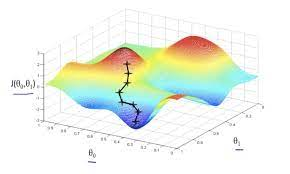

Diferente do AdaBoost e do GradientBoost, o XGBoost é um algoritmo complexo com muitos passos envolvidos.  

Em suma ele utiliza:
- Grandient Boost
- Regularização
- Approximate Greedy Algorithm
- Parallel Learning
- Weighted Quantile Sketch
- Sparsity-Aware split finding
- Cache-Aware Access
- Blocks for Out-of-Core Computation


Aqui está uma série de videos para compreender melhor o XGBoost e como ele funciona.  

[Video 1](https://www.youtube.com/watch?v=OtD8wVaFm6E)  
[Video 2](https://www.youtube.com/watch?v=8b1JEDvenQU)  
[Video 3](https://www.youtube.com/watch?v=ZVFeW798-2I)  
[Video 4](https://www.youtube.com/watch?v=oRrKeUCEbq8)  

Podemos encaixar quais algoritmos explorar em detalhes no fim do curso.  

No caso do __XGBoost__, o nome significa _Extreme Gradient Boosting_, ou seja ele utiliza de otimizações e uma arquitetura mais robusta para desenvolver resultados mais eficientes e com um custo computacional menor!

<br>

Este modelo junto com o _LightGBM_, são os modelos que dominaram as competições do _Kaggle_, se mostrando com os modelos mais eficientes:

Já o caso do __LightGBM__, foi um _framework_ otimizado do _Gradient Boosting_ desenvolvida pela _Microsoft Research_ e que impactou significativamente as competições de _Machine Learning_ com alta performance: 

In [ ]:
!pip install lightgbm

###  

__1)__ Realize uma classificação com da coluna y dos dados de marketing bancário (contido no arquivo `bank-full.csv`) utilizando mais de um modelo dentro dos modelos conhecidos por vocês. Qual o melhor modelo a ser implementado?

__2)__ Com os dados do arquivo `Admission_Predict.csv` realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado.

## 